# Summary

List of visualization:
- Ratio of training set
- Top Charsets
- Top sender email domain
- Range of email sent date
- Range for the length of email subject
- Range for the length of email body
- No. of URLs found in message body
- Features correlation matrix
- Pairplot 


# Import libraries

In [1]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load datasets

In [2]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

enron_df represent the legitimate datasets and mal_df is the opposite of enron_df which is the malicious part of the datasets

In [3]:
import random

part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(frac=1, ignore_index=True, random_state=rand)

## Ratio of the training set

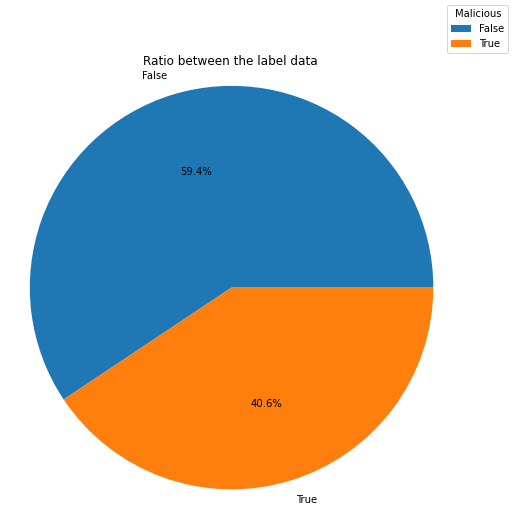

In [4]:
df = training_set.groupby('malicious').size()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df.values, labels=df.index,  autopct='%1.1f%%')
ax.axis('equal') 
fig.set_facecolor('white')
fig.legend(df.index, title="Malicious")

plt.title("Ratio between the label data")
plt.show()

# Top Charsets

In [5]:
def getPieChartCharset(series):
    used_charset = series.groupby('charset', dropna=False).charset.count()
    used_charset = used_charset.sort_values(ascending=False)
    top_x = used_charset[:5]
    others = pd.Series(used_charset[5:].sum(), index=['others'])
    top_charsets = pd.concat([top_x, others])
    top_charsets.rename = "Top Charsets"
    
    fig, ax = plt.subplots(figsize=(20, 10))
    top_charsets.plot(kind='pie', fontsize=20, ylabel='Top Charsets',subplots=True, ax=ax)
    fig.set_facecolor('white')
    plt.show()

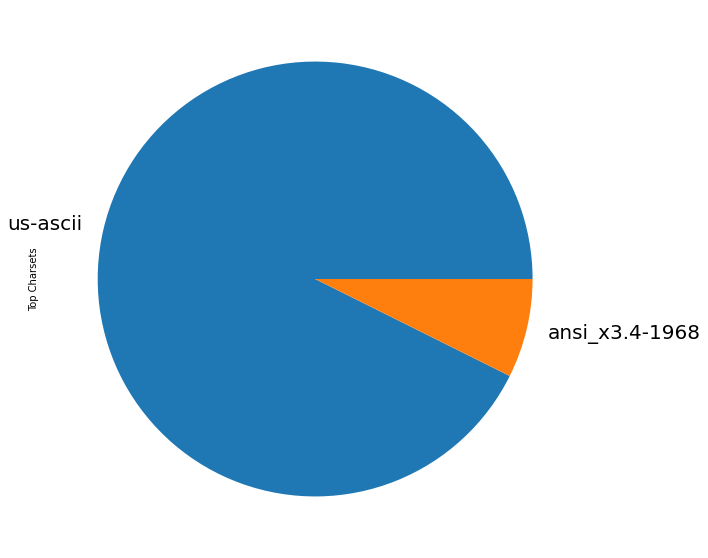

In [6]:
getPieChartCharset(enron_df)

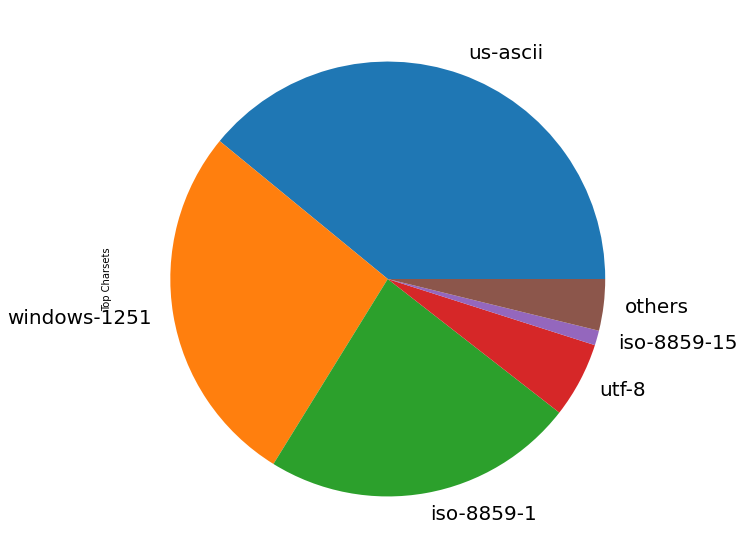

In [7]:
getPieChartCharset(mal_df)

# Top Domain used to send email

In [8]:
def getPieChartDomain(series):
    top_domain = series.groupby('from_domain', dropna=False).from_domain.count()
    top_domain = top_domain.sort_values(ascending=False)
    top_x = top_domain[:5]
    others = pd.Series(top_domain[5:].sum(), index=['others'])
    top_domain = pd.concat([top_x, others])
    top_domain.rename = "Top Charsets"
    top_domain.plot(kind='pie', figsize=(7,7), fontsize=16, ylabel='Top 5 Email Domain',subplots=True, legend=True)

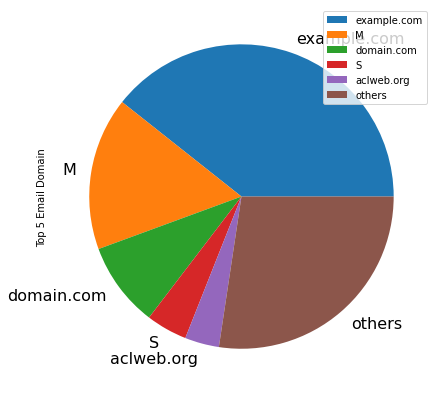

In [9]:
getPieChartDomain(mal_df)

the figure above is the proportion of email domain that the sender used on the malicious datasets

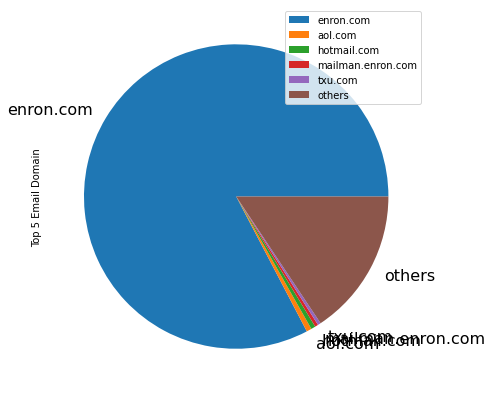

In [10]:
getPieChartDomain(enron_df)

in comparison to the malicious dataset, the legitimate datasets represented by the figure above is less diverse. Reason being that this dataset are source from an internal exchange from a company

# Range of periods when the email is send

In [11]:
date = mal_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

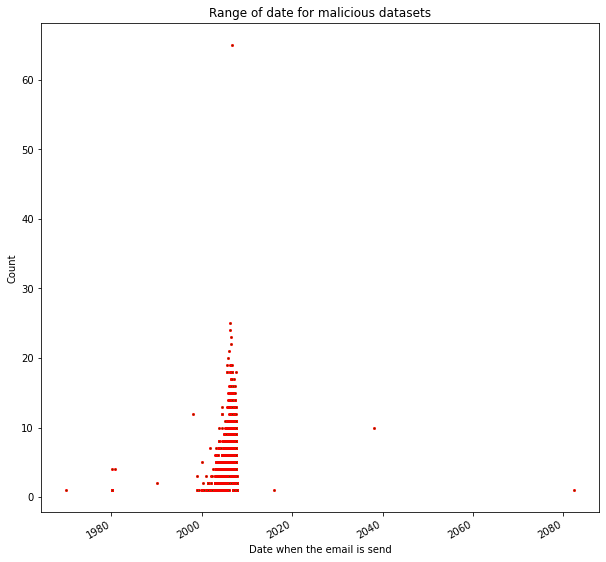

In [12]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.title('Range of date for malicious datasets')
plt.show()

As you can see from the figure above the data is capture predominantly in early 2000s, other data points that are observed going to the future or to the extreme past are false datetime.

In [13]:
date = enron_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

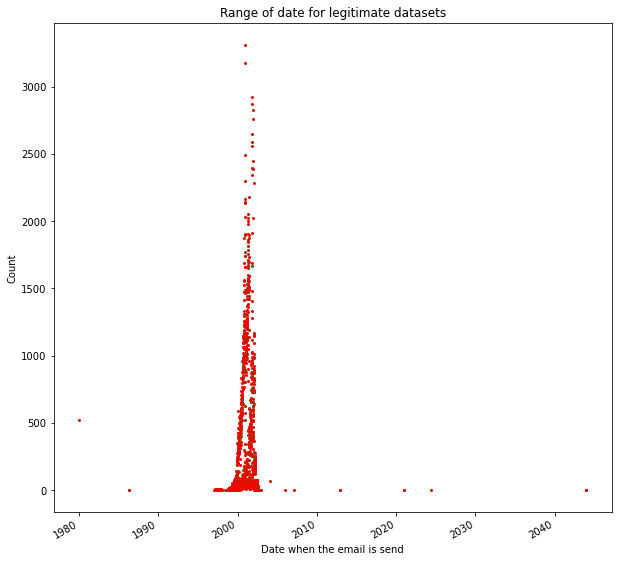

In [14]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)

plt.ylabel('Count')
plt.title('Range of date for legitimate datasets')
plt.xlabel('Date when the email is send')
plt.show()

In the legitimate datasets, we can see some data that are not whithin the actual range of the datasets. 

Some of these anomalous data point can be assume to be caused by falsification of data for the date.

in SMTP all of the headers can be change or fallsified so having an email with a wrong date in far past or far future can be an indication of tampered email 

# Lenght of email subject

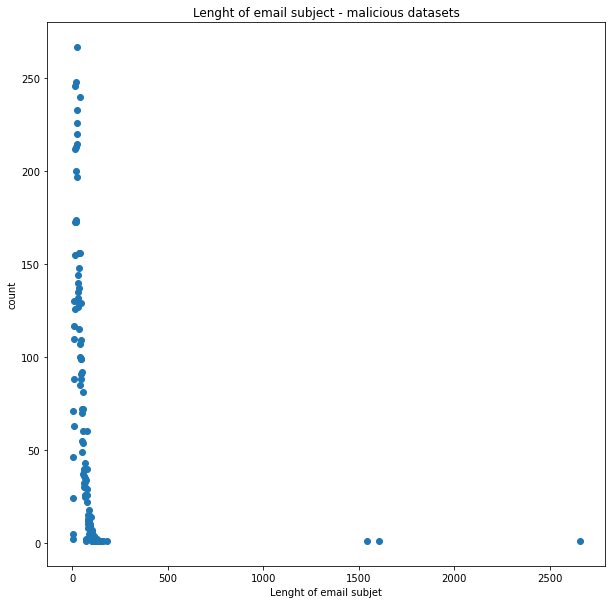

In [29]:
subject = mal_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.title('Lenght of email subject - malicious datasets')
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

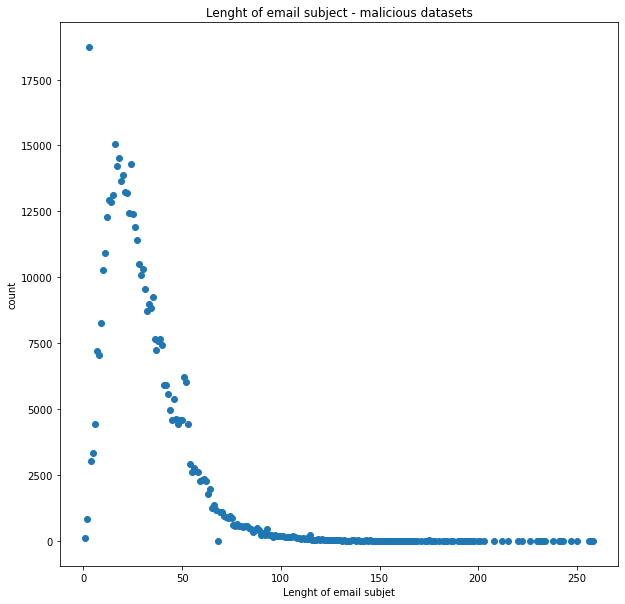

In [30]:
subject = enron_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.title('Lenght of email subject - malicious datasets')
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

For both datasets the subject lenght are in the range of 0-300, outlier do exist in the datasets

# Comparison Length of email body in the training set

In [17]:
import seaborn as sns

In [18]:
training_set['body_len'] = training_set.body.apply(lambda x: len(x))
s = training_set[['body_len', 'malicious']]

In [19]:
s.groupby('malicious').mean()

,body_len
malicious,
False,1813.480414
True,5273.668717


Text(0.5, 1.0, 'Comparison the lenght of Body (0 - 10k)')

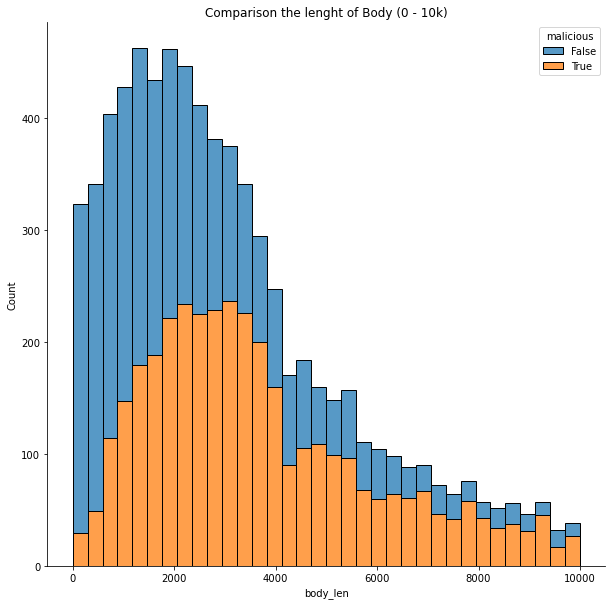

In [20]:
df = s[s.body_len < 10000].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (0 - 10k)')

Text(0.5, 1.0, 'Comparison the lenght of Body (10k - 50k)')

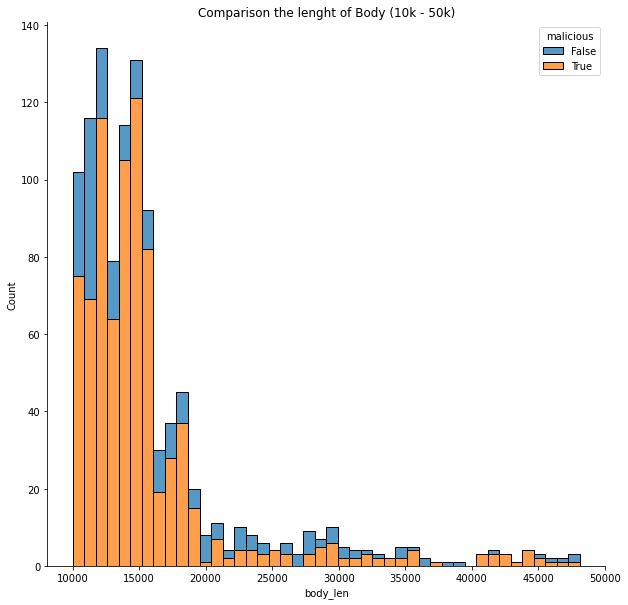

In [21]:
df = s[(s.body_len > 10000) & (s.body_len < 50000)].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (10k - 50k)')

Text(0.5, 1.0, 'Comparison the lenght of Body (50k)')

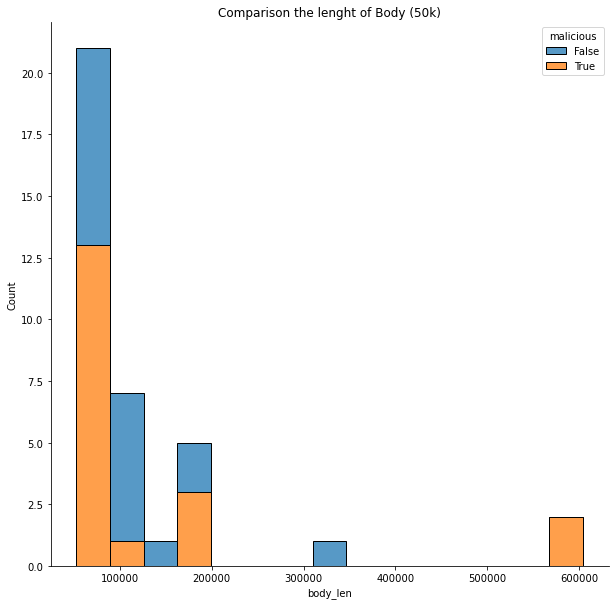

In [22]:
df = s[(s.body_len > 50000)].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (50k)')

# No of URLs found in message body

In [36]:
mal_df.URLs_in_message.describe()

count    8129.000000
mean        5.668840
std        12.102369
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max       127.000000
Name: URLs_in_message, dtype: float64

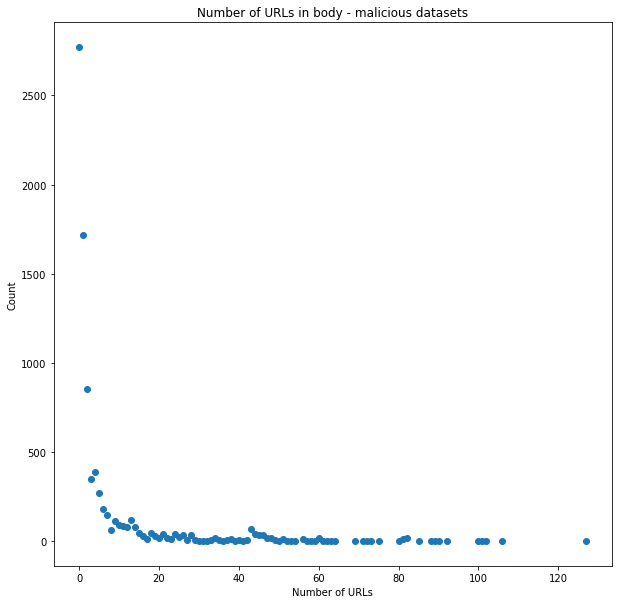

In [40]:
temp = mal_df.URLs_in_message.groupby(mal_df.URLs_in_message.values).count()
y = temp
x = temp.index 

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
fig.set_size_inches(10,10)
plt.title('Number of URLs in body - malicious datasets')
plt.ylabel('Count')
plt.xlabel('Number of URLs')
plt.show()

In [37]:
enron_df.URLs_in_message.describe()


count    517401.000000
mean          0.631158
std           4.862929
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         539.000000
Name: URLs_in_message, dtype: float64

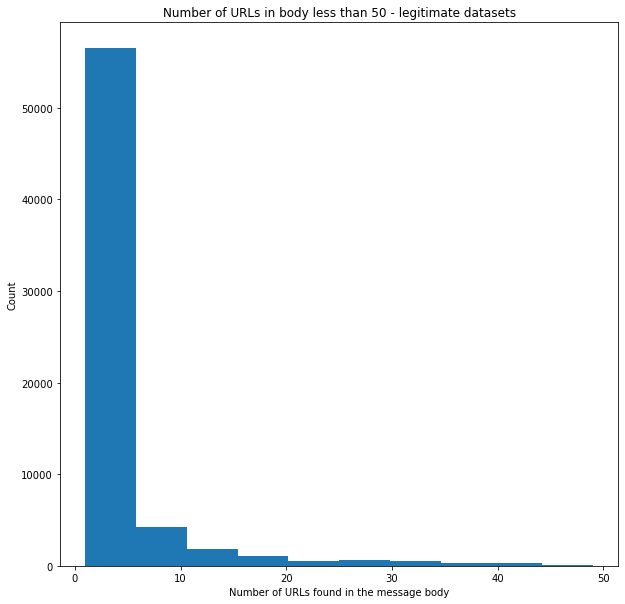

In [51]:
df = enron_df[(enron_df.URLs_in_message > 0) & (enron_df.URLs_in_message < 50)]
x = df.URLs_in_message.values
# y = df.URLs_in_message

fig, ax = plt.subplots()
ax.hist(x)
fig.set_size_inches(10,10)
plt.title('Number of URLs in body less than 50 - legitimate datasets')
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

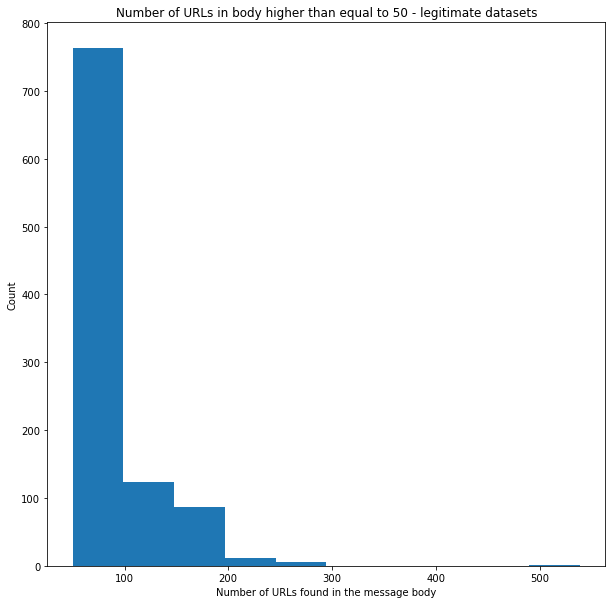

In [52]:
df = enron_df[(enron_df.URLs_in_message >= 50)]
x = df.URLs_in_message.values
# y = df.URLs_in_message

fig, ax = plt.subplots()
ax.hist(x)
fig.set_size_inches(10,10)
plt.title('Number of URLs in body higher than equal to 50 - legitimate datasets')
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

# Correlation Matrix

In [25]:
import random


part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(
    frac=1, ignore_index=True, random_state=rand)

In [26]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html',
    'javascript',
    'css',
    'html_form',
    'html_iframe',
    'URLs_in_message',
    'subject_len',
    'subject_entropy',
    'body_entropy',
    'attachement',
    'malicious'
]

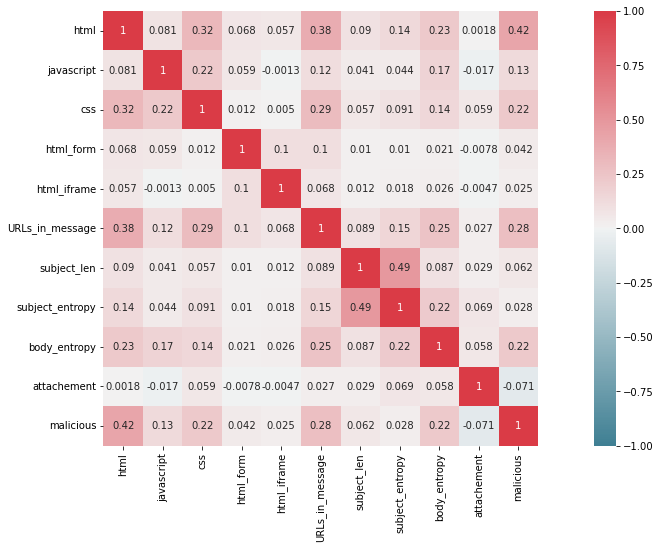

In [27]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 8))
corr = training_set[features].corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

from the correlation matrix figure above, there are several high correlation which can be observed with the malicious label by which, are the one we want to predict.

the features that have high correlation with the label are: html, javascript, css, urls_in_message, body_entropy

# pairplot

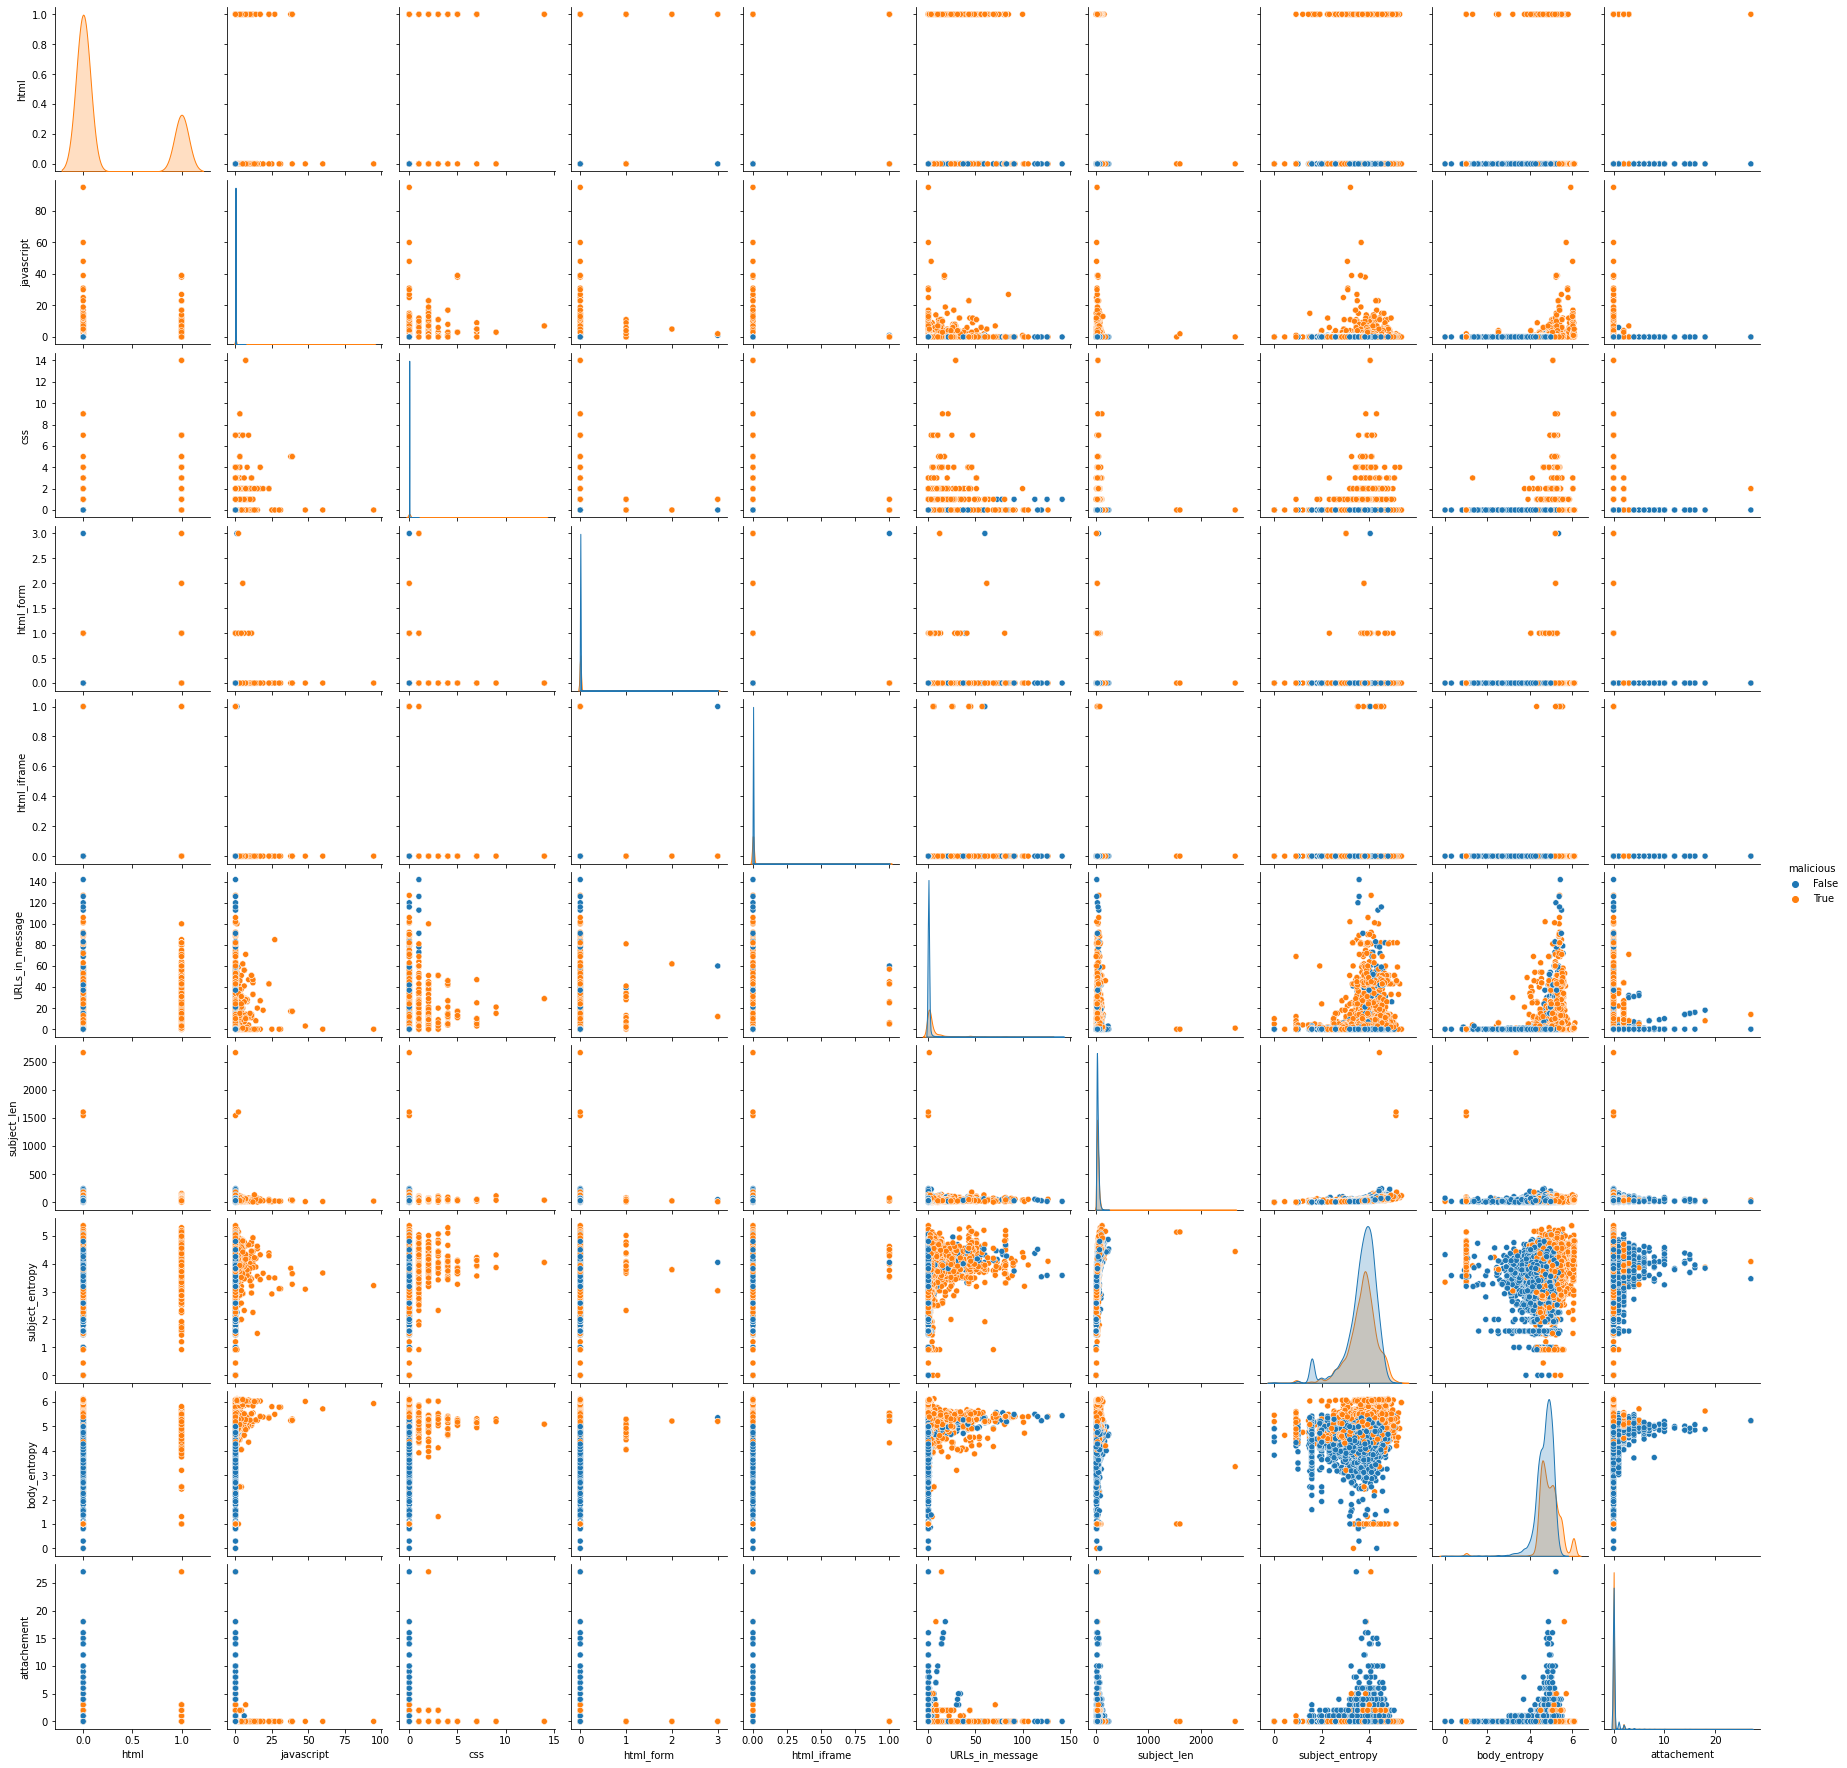

In [28]:
sns.pairplot(training_set[features], hue='malicious')